# Introducción:

Este proyecto tiene como objetivo explorar y analizar datos relacionados con el servicio de taxis en Chicago. A través de la aplicación de diversas técnicas de procesamiento y visualización de datos, se busca extraer insights valiosos que ayuden a comprender mejor el funcionamiento del servicio y a tomar decisiones informadas. El proyecto se divide en varias secciones, comenzando con la importación y exploración de los datos, seguido de un análisis detallado de las compañías de taxis y las ubicaciones de destino. Posteriormente, se abordan cuestiones específicas, como la identificación de los 10 principales barrios en términos de finalización de recorridos y la realización de una prueba de hipótesis sobre la duración promedio de los viajes en días lluviosos.


# 1. Importar las bibliotecas y cargar los datos:

In [104]:

import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats


In [105]:
df1=pd.read_csv(os.path.join('..','DataFrames','sql1.csv'))
df4=pd.read_csv(os.path.join('..','DataFrames','sql4.csv'))
df7=pd.read_csv(os.path.join('..','DataFrames','sql7.csv'))


# 2. Estudiar los datos:

In [106]:
print(f'SQL1:\n{df1.describe()}\nSQL4:\n{df4.describe()}\nSQL7:\n{df7.describe()}')

SQL1:
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000
SQL4:
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667
SQL7:
       duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%         1438.250000
50%         1980.000000
75%         2580.000000
max         7440.000000


In [107]:
print(f'SQL1:\n{df1.info()}\nSQL4:\n{df4.info()}\nSQL7:\n{df7.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_se

# 3. Asegurarse de que los tipos de datos sean correctos:

In [108]:
print(f'SQ1')
for i, r in df1.iterrows():
    for j in df1.columns.tolist():
        print(type(r[j]))
    break
print(f'SQ4')
for i, r in df4.iterrows():
    for j in df4.columns.tolist():
        print(type(r[j]))
    break
#df1['trips_amount']=pd.to_numeric(df1['trips_amount'])
#df4['average_trips']=pd.to_numeric(df4['average_trips'])

SQ1
<class 'str'>
<class 'int'>
SQ4
<class 'str'>
<class 'float'>


# 4. Identificar los 10 principales barrios en términos de finalización del recorrido:

In [109]:
top_10_barrios=df4.nlargest(10,'average_trips')
display(top_10_barrios)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


# 5. Hacer gráficos:

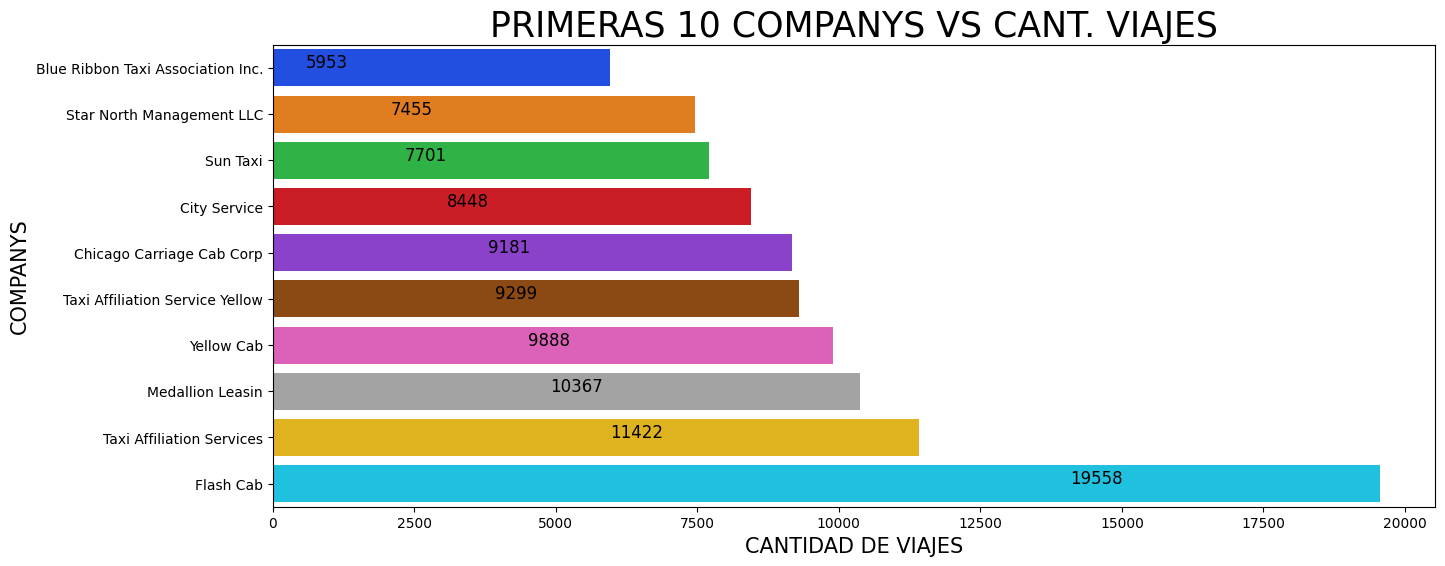

In [110]:
df1_ordenados=df1.nlargest(10,'trips_amount')[::-1]


plt.figure(figsize=(15,6))
sns.barplot(x='trips_amount', y='company_name', data=df1_ordenados, orient='h', hue='company_name', palette='bright')
plt.title('PRIMERAS 10 COMPANYS VS CANT. VIAJES',size=25)
plt.xlabel('CANTIDAD DE VIAJES', size=15)
plt.ylabel('COMPANYS',size=15)
c=1
for i,v in enumerate(df1['trips_amount']):
    plt.text(v-5000,9-i, str(v), color='black', ha='center', fontsize=12)
    c+=1
    if c>10:
        break

plt.show()

# CONCLUSIONES:

- 1.- LA COMPANIA DE TAXIS QUE MAS CANTIDAD DE VIAJES HACE ES FLASH CAB
- 2.- LA COMPANIA DE TAXIS QUE MENOS CANTIDAD DE VIAJES HACE ES BLU RIBBON TAXIS ASSOCIATION INC.
- ESTO SON LAS CONCLUSIONES QUE YO PUEDO RESCATAR MAS IMPORTANTES DE LOS PRIMEROS 10 DATOS QUE TENGO EN EL DATAFRAME SQL1

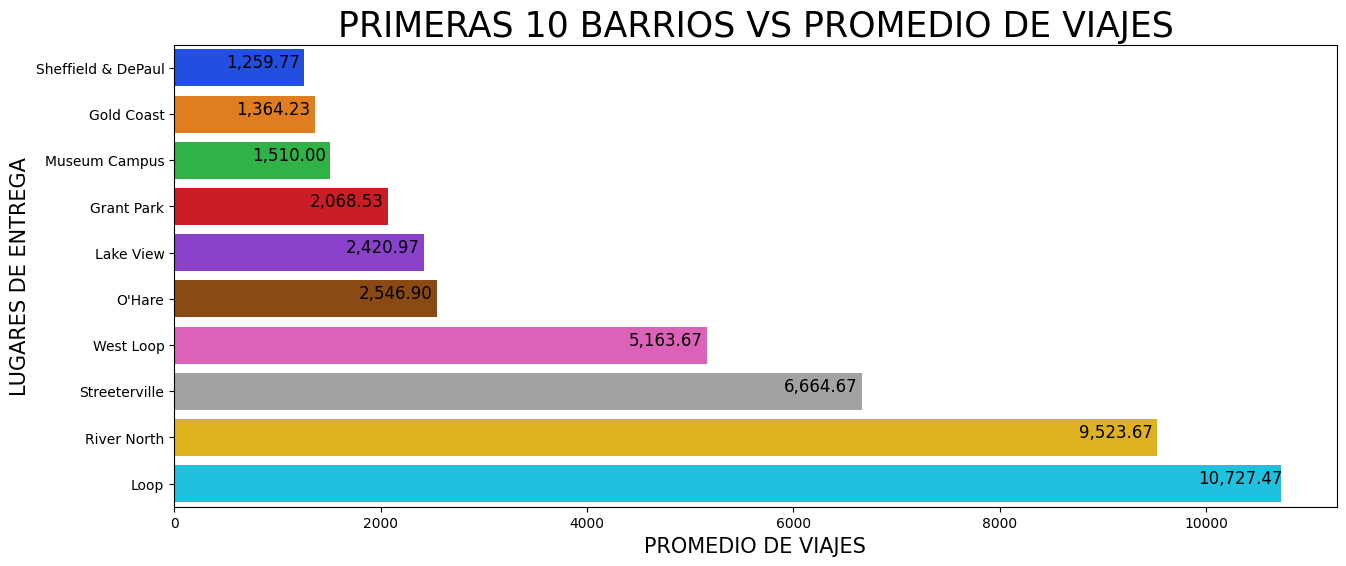

In [119]:
df4_ordenados=df4.sort_values(by='average_trips',ascending=True)

df4_first_10=df4_ordenados.tail(10)

plt.figure(figsize=(15,6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=df4_first_10, orient='h', hue='dropoff_location_name', palette='bright')
plt.title('PRIMERAS 10 BARRIOS VS PROMEDIO DE VIAJES',size=25)
plt.xlabel('PROMEDIO DE VIAJES', size=15)
plt.ylabel('LUGARES DE ENTREGA',size=15)
c=1
for i,v in enumerate(df4['average_trips']):
    plt.text(v-400,9-i, f'{v:,.2f}', color='black', ha='center', fontsize=12)
    c+=1
    if c>10:
        break

plt.show()

# CONCLUSIONES:

- 1.- EL BARRIO CON MAS PROMEDIO DE VIAJES ES LOOP
- 2.- EL BARRIO CON MENOS PROMEDIO DE VIAJES ES SHEFFIELD & DEPAUL
- ESTO SON LAS CONCLUSIONES QUE YO PUEDO RESCATAR MAS IMPORTANTES DE LOS PRIMEROS 10 DATOS QUE TENGO EN EL DATAFRAME SQL1

# 6. Prueba de Hipótesis (Python)

In [121]:
seguridad=0.95
alpha=seguridad-1
mal_clima=df7[df7['weather_conditions'].isin(['Bad'])]
buen_clima=df7[df7['weather_conditions'].isin(['Good'])]
t_valor, p_valor= stats.ttest_ind(mal_clima['duration_seconds'], buen_clima['duration_seconds'])


In [123]:
print(f'T: {t_valor}\nP: {p_valor}')

T: 6.946177714041499
P: 6.517970327099473e-12


# PRUEBA DE HIPOTESIS

In [124]:
h_nula="La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos"
h_alternativa="La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"


if alpha > p_valor:
    print(h_nula)
else:
    print(h_alternativa)

La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos


# Conclusion de resultado "prueba de hipotesis"

In [134]:
nsr=((1-p_valor)*100)
nsrs=f'{nsr:.2f}%'
print(f'Nivel de seguridad real de la desicion: {nsrs}')

Nivel de seguridad real de la desicion: 100.00%


# Conclusion

La decision de que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos esta en un 100% seguro de que asi es despues de haber realizado la prueba t